## Summary

<p>
The <a href="https://worldhappiness.report/ed/2018/">World Happiness Report</a> is a landmark survey of the state of global happiness that ranks more than 150 countries by how happy their citizens perceive themselves to be. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.
</p>

<p>    
Further more the report contains assumptions about contributing factors like economic production, social support, life expectancy, freedom, ... 
</p>
<p>    
In this project pandas is used to clean and aggregate the data. Also seaborn is used for visualization.
Guiding questions are:
</p>

<ul>
<li>
How can we get better insights into the happiness scores by aggregating the data?
</li>
<li>
How do world regions differ in happiness?
</li>
<li>
How did world happiness change from 2015 to 2017?
</li>
<li>
Which factors contribute the most to the happiness score?
</li>
</ul>


### Import packages

In [975]:
import pandas as pd
import glob
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import numpy as np

Read data into files and dataframes using read_csv and glob.

In [976]:
happy2015 = pd.read_csv("world-happiness-report/2015.csv", header=0)
happy2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


Using glob to read multiple files in at the same time.

In [977]:
path = r'world-happiness-report'
filenames = glob.glob(path + "/*.csv")

In [978]:
print(filenames)

['world-happiness-report\\2015.csv', 'world-happiness-report\\2016.csv', 'world-happiness-report\\2017.csv']


In [979]:
happy_2015_1 = filenames[0]
happy_2015_1

'world-happiness-report\\2015.csv'

In [980]:
happy_df = []

for filename in filenames:
    happy_df.append(pd.read_csv(filename))

In [981]:
happy_df[happy_df == "2015.csv"].head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [982]:
print(type(happy_df))

<class 'list'>


In [983]:
for i in range(3):
    print(happy_df[i].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                   

The variables of the data frame are not totally the same.

In [984]:
for i in range(3):
    print(happy_df[i].shape)
    print(happy_df[i].columns)

(158, 12)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
(157, 13)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
(155, 12)
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


Some variables are the same but written differently.  In particular the column names in 2017 are not the same as in the other data frames. The column names of 2017 are adapted below.

Add a year column into every dataframe using zip, Re, Regex.

In [985]:
happy_df_2 = []

for dataframe, filename in zip(happy_df, filenames):
    dataframe['year'] = re.search(r"2\d\d\d",filename).group(0)
    happy_df_2.append(dataframe)

In [986]:
for i in range(len(happy_df_2)):
               print(happy_df_2[i]["year"].head())

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: object
0    2016
1    2016
2    2016
3    2016
4    2016
Name: year, dtype: object
0    2017
1    2017
2    2017
3    2017
4    2017
Name: year, dtype: object


In [987]:
for i in range(len(happy_df_2)):
               print(happy_df_2[i].columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'year'],
      dtype='object')


### Exploring World Happiness Report 2015

In [988]:
happiness2015 = happy_df_2[0]

In [989]:
first_5 = happiness2015[0:5]
print(first_5)

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [990]:
info = first_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
Country                          5 non-null object
Region                           5 non-null object
Happiness Rank                   5 non-null int64
Happiness Score                  5 non-null float64
Standard Error                   5 non-null float64
Economy (GDP per Capita)         5 non-null float64
Family                           5 non-null float64
Health (Life Expectancy)         5 non-null float64
Freedom                          5 non-null float64
Trust (Government Corruption)    5 non-null float64
Generosity                       5 non-null float64
Dystopia Residual                5 non-null float64
year                             5 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 600.0+ bytes


In [991]:
happiness2016 = happy_df_2[1]
first_5_16 = happiness2016[0:5]
print(first_5_16)

       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                

In [992]:
happiness2017 = happy_df_2[2]
first_5_17 = happiness2017[0:5]
print(first_5_17)

       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  yea

In [993]:
happiness2017.rename(index=str, columns={"Happiness.Score":"Happiness Score", 
                                         'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                                         'Health..Life.Expectancy.':'Health (Life Expectancy)',
                                         'Trust..Government.Corruption.':'Trust (Government Corruption)',
                                         'Happiness.Rank':'Happiness Rank',
                                         'Dystopia.Residual':'Dystopia Residual'},
                                         inplace=True)
print(happiness2017.columns)

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual', 'year'],
      dtype='object')


In [994]:
happiness2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
year                             157 non-null object
dtypes: float64(10), int64(1), object(3)
memory usage: 17.2+ KB


In [995]:
for i in range(0,3):
    print(happy_df[i].shape)
    print(happy_df[i].shape[0]*happy_df[i].shape[1])
    print(sum(happy_df[i].notnull().count()))

(158, 13)
2054
2054
(157, 14)
2198
2198
(155, 13)
2015
2015


There are not any null values.

### Happiness Score
Getting statistics and visualizing the happiness score

In [996]:
print(len(happiness2015["Country"].unique()))


158


Countries are 158, too many categorical variables on x-axis.

In [997]:
print(happiness2015['Happiness Score'].describe())

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64


Univariate distribution of the Happiness Score variable.

The seaborn.distplot function expects either pandas Series, single-dimensional numpy.array, 
or a Python list as input. Then, it determines the size of the bins according to the Freedman-Diaconis rule, 
and finally it fits a kernel density estimate (KDE) over the histogram:
[hub.packtpub.com](https://hub.packtpub.com/visualizing-univariate-distribution-seaborn/)

C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


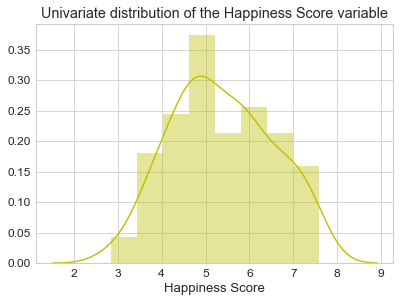

In [998]:
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.5)  
ax = sns.distplot(happiness2015['Happiness Score'], color="y").set_title("Univariate distribution of the Happiness Score variable")
plt.show()

In [999]:
# additional calculation
for i in range(2015,2018):
    print(i)

2015
2016
2017


In [1000]:
happy_df_2[2]['Happiness Score'].kurtosis(skipna=True)

-0.75041865732502311

In [1001]:
kurtosis_hs_1 = {}

for i in range(0,3):
    kurtosis_df = happy_df[i]['Happiness Score'].kurtosis(skipna=True)
    for year in range(2015,2018):
        kurtosis_hs_1[year] = kurtosis_df
    
print(kurtosis_hs_1)

{2015: -0.75041865732502311, 2016: -0.75041865732502311, 2017: -0.75041865732502311}


<p>
According to values using the rule of thumb and visual checking the distributions are platykurtic.
As kurtosis is sensitive to the sample size these insights are of less immediate value. However it raises
the question if a data transformation could be useful.
</p>

<p>
Rule of thumb:
</p>
<p>
Most often, kurtosis is measured against the normal distribution.  If the kurtosis is close to 0, then a 
normal distribution is often assumed.  These are called mesokurtic distributions.  If the kurtosis is less 
than zero, then the distribution is light tails and is called a platykurtic distribution.  
If the kurtosis is greater than zero, then the distribution has heavier tails and is called a leptokurtic distribution.
</p>
<p>
<a href ="https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics">
SPC for Excel
</a>
</p>

In [1002]:
skewness_hs_2 = {}

for i in range(0,3):
    skewness_df = happy_df[i]['Happiness Score'].kurtosis(skipna=True)
    for year in range(2015,2018):
        skewness_hs_2[year] = skewness_df
        
print(skewness_hs_2)

{2015: -0.75041865732502311, 2016: -0.75041865732502311, 2017: -0.75041865732502311}


<p>
According to values using the rule of thumb and visual checking the distributions are moderatly skewed.
The normal distribution is discernible, while clearly not symmetrical. Can data transformation reduce the 
skewness and make the distributions more "normal"?.
</p>
<p>
Rule of thumb:
</p>
<ul>
<li>If the skewness is between -0.5 and 0.5, the data are fairly symmetrical</li>
<li>If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed</li>
<li>If the skewness is less than -1 or greater than 1, the data are highly skewed</li>
</ul>
<p>
<a href ="https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics">
SPC for Excel
</a>
</p>



In [1003]:
def ecdf(s, name):
    """Compute ECDF for a one-dimensional array of measurements."""
    # s is a data series
    # name is a string
    # Create a series of ordered x-values
    x = np.sort(s)
    # Number of data points: n
    n = len(s)
    # y-data for the ECDF: y
    y = np.arange(start=1, stop=n+1)/n
    # Plot the ECDF
    plt.plot(x, y, marker='.', linestyle='none', color="red")
    plt.xlabel(name)
    plt.ylabel("Cumulative probabilities")
    plt.title("Empirical cumulative distribution function (ECDF)")
    plt.show()

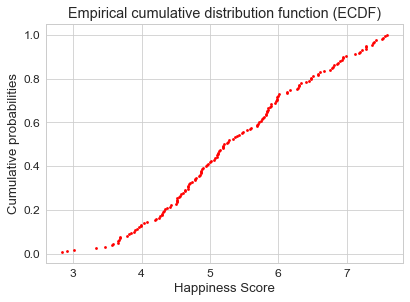

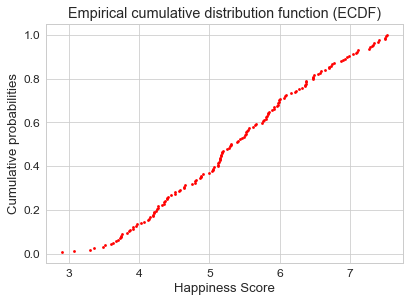

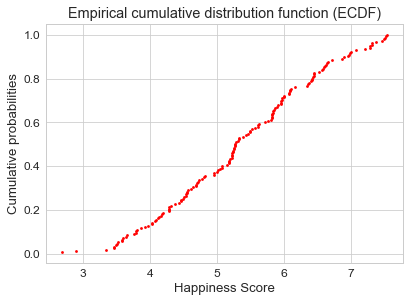

In [1004]:
for i in range(0,3):
    ecdf(happy_df[i]['Happiness Score'], 'Happiness Score' )

<p>
From 2015 2016 the share of countries with a Happiness Score of 5 decreased only slightly.
</p>
<ul>
<li>
Ca. 41% of the countries had Happiness Score of 5 or less in 2015.
</li>
<li>
Ca. 38% of the countries had Happiness Score of 5 or less in 2016.
</li>
<li>
Ca. 38% of the countries had Happiness Score of 5 or less in 2016.
</li>
</ul>

In [1005]:
top_5_happy_countries_15 = print(happiness2015.loc[153:158, ["Country",'Happiness Score']])

     Country  Happiness Score
153   Rwanda            3.465
154    Benin            3.340
155    Syria            3.006
156  Burundi            2.905
157     Togo            2.839


In [1006]:
top_5_unhappy_countries_15 = print(happiness2015.loc[0:5, ["Country",'Happiness Score']])

       Country  Happiness Score
0  Switzerland            7.587
1      Iceland            7.561
2      Denmark            7.527
3       Norway            7.522
4       Canada            7.427
5      Finland            7.406


In [1007]:
happiness2015_sorted = happiness2015.sort_values(by = "Happiness Score", ascending = False)
top_ten = happiness2015_sorted.loc[0:9, ["Country","Region",'Happiness Score']]
print(top_ten )

       Country                     Region  Happiness Score
0  Switzerland             Western Europe            7.587
1      Iceland             Western Europe            7.561
2      Denmark             Western Europe            7.527
3       Norway             Western Europe            7.522
4       Canada              North America            7.427
5      Finland             Western Europe            7.406
6  Netherlands             Western Europe            7.378
7       Sweden             Western Europe            7.364
8  New Zealand  Australia and New Zealand            7.286
9    Australia  Australia and New Zealand            7.284


7 out of the top ten countries are from Western Europe.

Plotting happiness scores by country

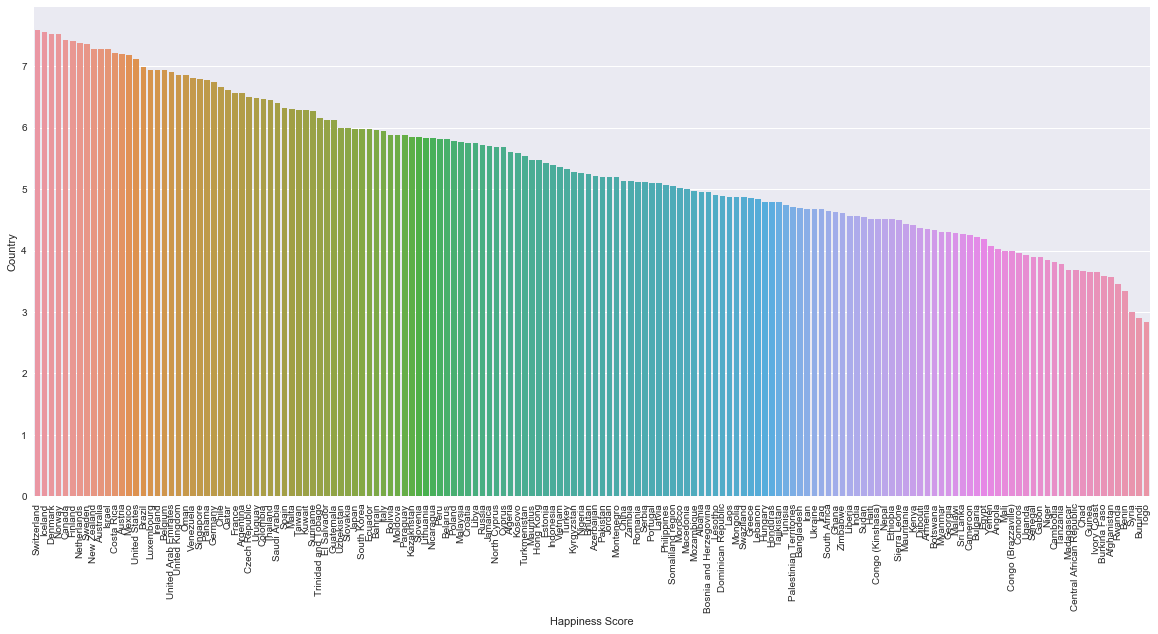

In [1008]:

sns.set(rc={'figure.figsize':(20,9)})
ax = sns.barplot(x="Country", y="Happiness Score", data=happiness2015)
ax.set(xlabel='Happiness Score', ylabel='Country')
plt.xticks(rotation=90)
plt.show()

In [1009]:
### Grouping and aggregating by Region

In [1010]:
print(happiness2015["Region"].value_counts())

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64


Plotting happiness scores for the southern asia region.

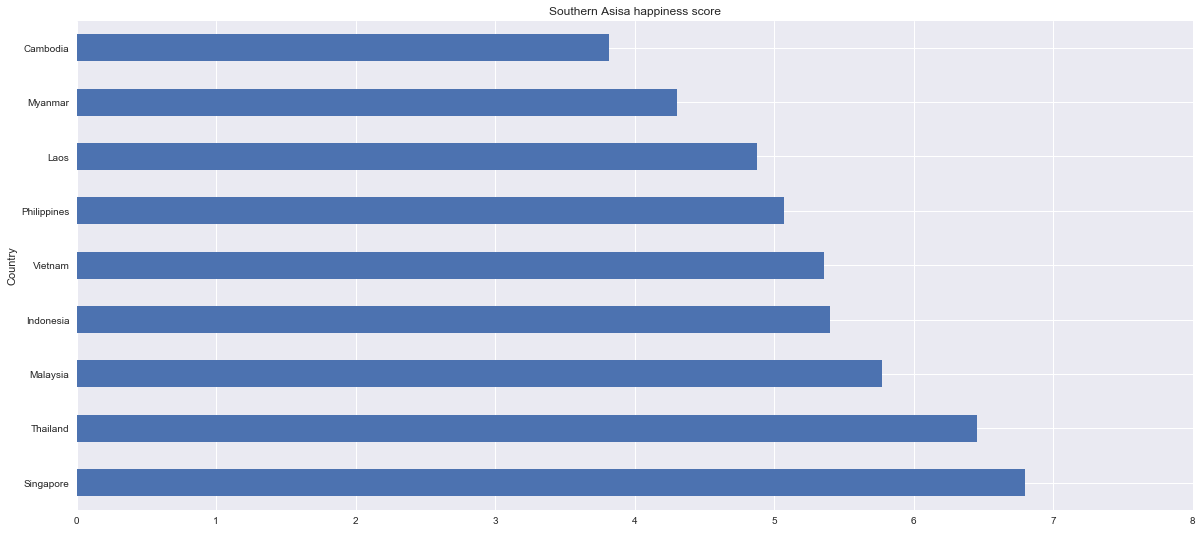

In [1011]:
southern_asia = happiness2015[happiness2015["Region"] == "Southeastern Asia"]
southern_asia.plot(x='Country', y='Happiness Score', kind='barh', title="Southern Asisa happiness score", 
                   legend=False, xlim=(0,8))


Making a comparison between regions of the world using the aggregated mean happiness score for every region 
(consisting of countries). For this purpose a split, apply, combine is developed within a for loop.

<ul>
<li>
Split the dataframe into groups.
</li>
<li>
Apply a function to each group.
</li>
<li>
Combine the results into one data structure.
</li>
</ul>


In [1012]:
mean_happiness = dict()
regions = happiness2015["Region"].unique()
print(regions)


['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [1013]:
for region in regions:
    region_group = happiness2015[happiness2015["Region"] == region]
    mean_happiness[region] = round(region_group['Happiness Score'].mean(),2)

In [1014]:
print(mean_happiness)

{'Western Europe': 6.69, 'North America': 7.27, 'Australia and New Zealand': 7.29, 'Middle East and Northern Africa': 5.41, 'Latin America and Caribbean': 6.14, 'Southeastern Asia': 5.32, 'Central and Eastern Europe': 5.33, 'Eastern Asia': 5.63, 'Sub-Saharan Africa': 4.2, 'Southern Asia': 4.58}


Australia and New Zealand has got the highest happiness score of 7.29. Sub-Saharan Africa has got the lowest 
happiness score with 4.2. While 7 out of the top ten countries are from Western Europe, Western Europe is only third with 6.69 behind North America with 7.27.

In [1015]:
grouped_region_15 = happiness2015.groupby('Region')

Making a dictionary of the groups. The keys are the 'Regions' and the value are the index number of the observations
in the original data frame.

In [1016]:
print(grouped_region_15.groups)

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'), 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
             72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
            126, 129, 133],
           dtype='int64'), 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'), 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
             47,  50,  52,  56,  57,  64,  97, 104, 118],
           dtype='int64'), 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
            106, 107, 109, 111, 134, 135, 155],
           dtype='int64'), 'North America': Int64Index([4, 14], dtype='int64'), 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'), 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'), 'Sub-Saharan Africa': Int64

Calculating number of observations (or countries) for every Region group.

In [1017]:
grouped_region_15.size() 

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

Happiness score on average for every region.

In [1018]:
grouped_region_15['Happiness Score'].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

Calculating mean Happiness Score using a pivot table.

In [1019]:
# If you pass margins=True to pivot_table, special All columns and rows will be 
# added with partial group aggregates across the categories on the rows and columns.
# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html


pivot_15_region_happy = happiness2015.pivot_table(values='Happiness Score', index='Region', margins=True)
print(pivot_15_region_happy)
pivot_15_region_happy.info()

                                 Happiness Score
Region                                          
Australia and New Zealand               7.285000
Central and Eastern Europe              5.332931
Eastern Asia                            5.626167
Latin America and Caribbean             6.144682
Middle East and Northern Africa         5.406900
North America                           7.273000
Southeastern Asia                       5.317444
Southern Asia                           4.580857
Sub-Saharan Africa                      4.202800
Western Europe                          6.689619
All                                     5.375734
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Australia and New Zealand to All
Data columns (total 1 columns):
Happiness Score    11 non-null float64
dtypes: float64(1)
memory usage: 176.0+ bytes


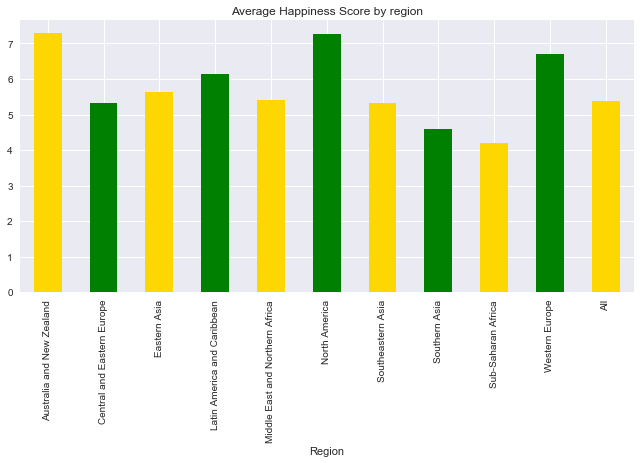

In [1020]:
pv15_mean = pivot_15_region_happy['Happiness Score'].plot.bar(title="Average Happiness Score by region", 
                                  legend=False, color=["gold", "green"], figsize=(11,5))
pv15_mean

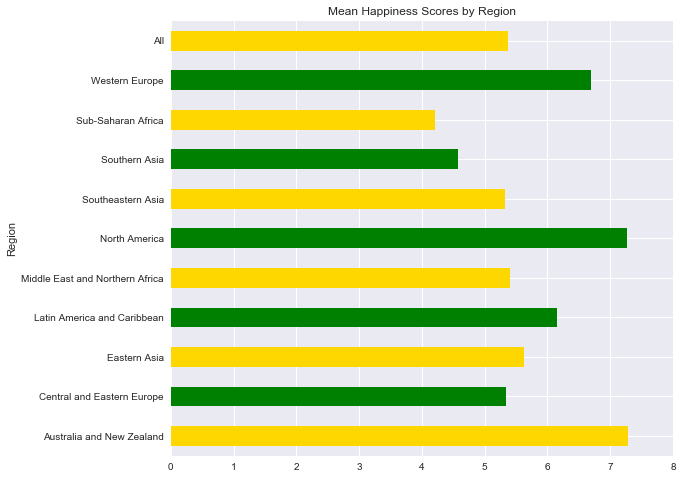

In [1021]:
pivot_15_region_happy.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,8), 
                           legend=False, color=['gold','green'], figsize=(9,8))

In [1022]:
mean_world_happiness= round(happiness2015['Happiness Score'].mean(),6)
mean_world_happiness

5.375734

The mean happiness score calculated directly from the original 'Happiness Score' 
data is the same as the "ALL" value of the pivot table.

Creating support functions for special statistics.

In [1023]:
# range between max and min
def range_between(group):
    return (group.max() - group.min())
# distance from max to mean
def difference(group):
    return(group.max() - group.mean())

def quant_25(group):
    return (np.percentile(group, q=25))

def quant_75(group):
    return (np.percentile(group, q=75))

Aggregate over many statistics

In [1024]:
region_2323 = grouped_region_15['Happiness Score'].agg([np.mean, np.max,  np.min, range_between, difference, np.std, quant_25, np.median, quant_75]).round(2)
print(region_2323)

                                 mean  amax  amin  range_between  difference  \
Region                                                                         
Australia and New Zealand        7.28  7.29  7.28           0.00        0.00   
Central and Eastern Europe       5.33  6.50  4.22           2.29        1.17   
Eastern Asia                     5.63  6.30  4.87           1.42        0.67   
Latin America and Caribbean      6.14  7.23  4.52           2.71        1.08   
Middle East and Northern Africa  5.41  7.28  3.01           4.27        1.87   
North America                    7.27  7.43  7.12           0.31        0.15   
Southeastern Asia                5.32  6.80  3.82           2.98        1.48   
Southern Asia                    4.58  5.25  3.58           1.68        0.67   
Sub-Saharan Africa               4.20  5.48  2.84           2.64        1.27   
Western Europe                   6.69  7.59  4.86           2.73        0.90   

                                  std  

Aggregate alternatively with pivot table.

In [1025]:
pv15_3434 = happiness2015.pivot_table(values="Happiness Score", index='Region', 
                                      aggfunc=[np.mean, np.min, np.max, np.std, np.median, range_between], margins=True)

pv15_3434

,mean,amin,amax,std,median,range_between
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,,
Australia and New Zealand,7.285000,7.284,7.286,0.001414,7.2850,0.002
Central and Eastern Europe,5.332931,4.218,6.505,0.570446,5.2860,2.287
Eastern Asia,5.626167,4.874,6.298,0.554053,5.7290,1.424
Latin America and Caribbean,6.144682,4.518,7.226,0.728560,6.1490,2.708
Middle East and Northern Africa,5.406900,3.006,7.278,1.101382,5.2620,4.272
North America,7.273000,7.119,7.427,0.217789,7.2730,0.308
Southeastern Asia,5.317444,3.819,6.798,0.950020,5.3600,2.979
Southern Asia,4.580857,3.575,5.253,0.570526,4.5650,1.678


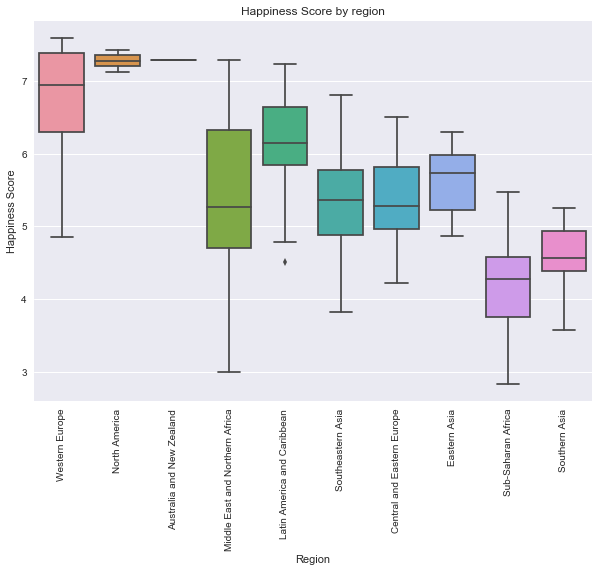

In [1026]:
sns.set(rc={'figure.figsize':(10,7)})
ax=sns.boxplot(x="Region", y="Happiness Score", data = happiness2015)
ax.set(title="Happiness Score by region")
plt.xticks(rotation=90)
plt.show()

Extracting 'Australia and New Zealand' group by index number taken from the dictionary.

In [1027]:
happ_aus_nz = happiness2015.loc[[8,9],]
happ_aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


Same for North America

In [1028]:
hap15_na = happiness2015.loc[[4, 14], ]

Australia and New Zealand

In [1029]:
grouped23 = grouped_region_15.get_group('Australia and New Zealand')
grouped23

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


In [1030]:
grouped23[['Happiness Score', 'Health (Life Expectancy)']].mean()

Happiness Score             7.285000
Health (Life Expectancy)    0.919965
dtype: float64

[Text(0, 0.5, 'Happiness Score'), Text(0.5, 0, 'Country')]

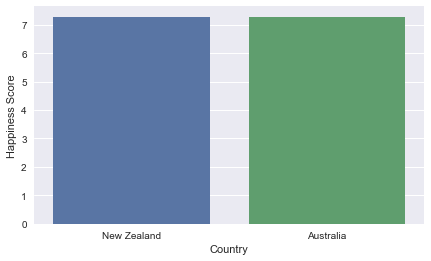

In [1031]:
sns.set(rc={'figure.figsize':(7,4)})
ax=sns.barplot(y='Happiness Score',x="Country", data=grouped23)
ax.set(xlabel='Country', ylabel='Happiness Score')

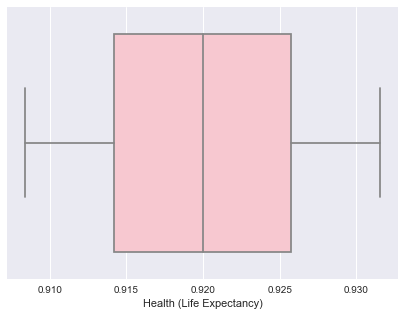

In [1032]:

sns.set(rc={'figure.figsize':(7,5)})
ax = sns.boxplot(x="Health (Life Expectancy)", data=grouped23, color="pink")
plt.show()

Western Europe

In [1033]:
group8934 = grouped_region_15.get_group('Western Europe')
group8934.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015


In [1034]:
group8934[['Happiness Score', 'Health (Life Expectancy)']].mean()

Happiness Score             6.689619
Health (Life Expectancy)    0.909148
dtype: float64

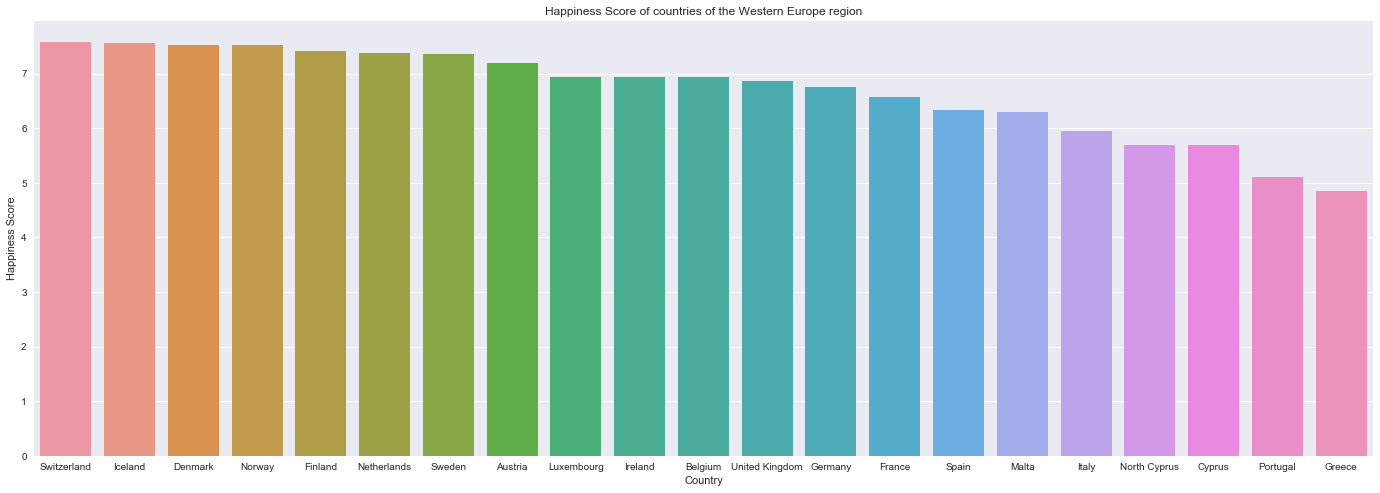

In [1035]:

sns.set(rc={'figure.figsize':(24,8)})
ax = sns.barplot(x="Country", y ="Happiness Score", data=group8934)
ax.set(xlabel="Country", ylabel="Happiness Score", title="Happiness Score of countries of the Western Europe region")
plt.show()

[Text(0.5, 0, 'Health (Life Expectancy)'),
 Text(0.5, 1.0, 'Wester Europe region')]

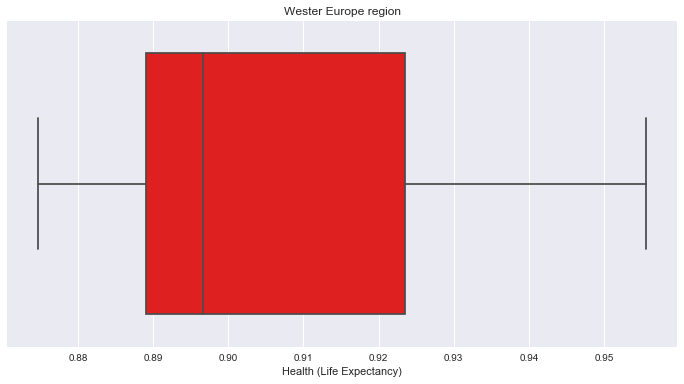

In [1036]:
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.boxplot(x="Health (Life Expectancy)", data=group8934, color="red")
ax.set(xlabel="Health (Life Expectancy)", title="Wester Europe region")

Aggregate the mean of multiple variables 

In [1037]:
pv_334 = happiness2015.pivot_table(values=['Happiness Score', 'Family', 'Economy (GDP per Capita)', 'Health (Life Expectancy)'], 
                                   index='Region', aggfunc=[np.mean, np.max, np.min])
pv_334

mean            \
                                Economy (GDP per Capita)    Family   
Region                                                               
Australia and New Zealand                       1.291880  1.314450   
Central and Eastern Europe                      0.942438  1.053042   
Eastern Asia                                    1.151780  1.099427   
Latin America and Caribbean                     0.876815  1.104720   
Middle East and Northern Africa                 1.066973  0.920490   
North America                                   1.360400  1.284860   
Southeastern Asia                               0.789054  0.940468   
Southern Asia                                   0.560486  0.645321   
Sub-Saharan Africa                              0.380473  0.809085   
Western Europe                                  1.298596  1.247302   

                                                                          \
                                Happiness Score Health (Life Expectancy)   
Region                                                                     
Australia and New Zealand              7.285000                 0.919965   
Central and Eastern Europe             5.332931                 0.718774   
Eastern Asia                           5.626167                 0.877388   
Latin America and Caribbean            6.144682                 0.703870   
Middle East and Northern Africa        5.406900                 0.705616   
North America                          7.273000                 0.883710   
Southeastern Asia                      5.317444                 0.677357   
Southern Asia                          4.580857                 0.540830   
Sub-Saharan Africa                     4.202800                 0.282332   
Western Europe                         6.689619                 0.909148   

                                                    amax           \
                                Economy (GDP per Capita)   Family   
Region                                                              
Australia and New Zealand                        1.33358  1.31967   
Central and Eastern Europe                       1.18498  1.34043   
Eastern Asia                                     1.38604  1.30060   
Latin America and Caribbean                      1.21183  1.30477   
Middle East and Northern Africa                  1.69042  1.22393   
North America                                    1.39451  1.32261   
Southeastern Asia                                1.52186  1.26504   
Southern Asia                                    0.83524  1.10395   
Sub-Saharan Africa                               1.06024  1.18468   
Western Europe                                   1.56391  1.40223   

                                                                          \
                                Happiness Score Health (Life Expectancy)   
Region                                                                     
Australia and New Zealand                 7.286                  0.93156   
Central and Eastern Europe                6.505                  0.87337   
Eastern Asia                              6.298                  1.01328   
Latin America and Caribbean               7.226                  0.86027   
Middle East and Northern Africa           7.278                  0.91387   
North America                             7.427                  0.90563   
Southeastern Asia                         6.798                  1.02525   
Southern Asia                             5.253                  0.70806   
Sub-Saharan Africa                        5.477                  0.70950   
Western Europe                            7.587                  0.95562   

                                                    amin           \
                                Economy (GDP per Capita)   Family   
Region                                                              
Australia and New Zealand                        1.25018  

In [1038]:
pv_56654 = happiness2015.groupby('Region')['Family', 'Happiness Score'].agg([np.mean, np.max, np.min])
pv_56654

Family                   Happiness Score  \
                                     mean     amax     amin            mean   
Region                                                                        
Australia and New Zealand        1.314450  1.31967  1.30923        7.285000   
Central and Eastern Europe       1.053042  1.34043  0.38562        5.332931   
Eastern Asia                     1.099427  1.30060  0.94675        5.626167   
Latin America and Caribbean      1.104720  1.30477  0.74302        6.144682   
Middle East and Northern Africa  0.920490  1.22393  0.47489        5.406900   
North America                    1.284860  1.32261  1.24711        7.273000   
Southeastern Asia                0.940468  1.26504  0.62736        5.317444   
Southern Asia                    0.645321  1.10395  0.30285        4.580857   
Sub-Saharan Africa               0.809085  1.18468  0.00000        4.202800   
Western Europe                   1.247302  1.40223  0.89318        6.689619   

                                               
                                  amax   amin  
Region                                         
Australia and New Zealand        7.286  7.284  
Central and Eastern Europe       6.505  4.218  
Eastern Asia                     6.298  4.874  
Latin America and Caribbean      7.226  4.518  
Middle East and Northern Africa  7.278  3.006  
North America                    7.427  7.119  
Southeastern Asia                6.798  3.819  
Southern Asia                    5.253  3.575  
Sub-Saharan Africa               5.477  2.839  
Western Europe                   7.587  4.857

The estimated extent to which family contributes to the happiness score is on average highest 
in Australia and New Zealand (1.314450) and lowest in Southern Asia (0.645321) and Sub-Saharan Africa (0.809085).
This is maybe contra intuitive as developing countries rely more strongly on family ties as a support mechanism 
contrary to developed countries with public wellfare and pension. Family plays a greater economic role in the former.
However this could be also an explanation. As family is released from the economic function it is less an economic burden and contributes more to happiness.

### Did world happiness grow, shrink, or was more or less constant from 2015 to 2017?

In [1039]:
print(happiness2016.columns)
print(happiness2016.loc[0:3,'year'])

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')
0    2016
1    2016
2    2016
3    2016
Name: year, dtype: object


Try out concat

In [1040]:
head_2015 = happiness2015[['Country','Happiness Score', 'year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'year']].head(3)
print(head_2015)
print(head_2016)

       Country  Happiness Score  year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015
       Country  Happiness Score  year
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016


In [1041]:
concat_axis_0 = pd.concat([head_2015, head_2016] , axis= 0)
concat_axis_1 = pd.concat([head_2015, head_2016] , axis= 1)

In [1042]:
print(concat_axis_0)
print(concat_axis_0.shape)
print(concat_axis_1)
print(concat_axis_1.shape)

       Country  Happiness Score  year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016
(6, 3)
       Country  Happiness Score  year      Country  Happiness Score  year
0  Switzerland            7.587  2015      Denmark            7.526  2016
1      Iceland            7.561  2015  Switzerland            7.509  2016
2      Denmark            7.527  2015      Iceland            7.501  2016
(3, 6)


Axis = 0 concats over rows and axis = 1 concats over columns.

Different columns / variables in 2015 and 2016.

In [1043]:
head_2015_2 = happiness2015[['year','Country','Happiness Score', 'Standard Error']].head()
head_2016_2 = happiness2016[['Country','Happiness Score', 'year']].head()

In [1044]:
concat_axis_0_2 = pd.concat([head_2015_2, head_2016_2], axis=0)
print(concat_axis_0_2)
print(concat_axis_0_2.shape)

       Country  Happiness Score  Standard Error  year
0  Switzerland            7.587         0.03411  2015
1      Iceland            7.561         0.04884  2015
2      Denmark            7.527         0.03328  2015
3       Norway            7.522         0.03880  2015
4       Canada            7.427         0.03553  2015
0      Denmark            7.526             NaN  2016
1  Switzerland            7.509             NaN  2016
2      Iceland            7.501             NaN  2016
3       Norway            7.498             NaN  2016
4      Finland            7.413             NaN  2016
(10, 4)


In [1045]:
concat_axis_2 = pd.concat([ happiness2015,  happiness2016])
print(concat_axis_2.head())
print(concat_axis_2.shape)
print(concat_axis_2.columns)
print(concat_axis_2.tail())

       Country  Dystopia Residual  Economy (GDP per Capita)   Family  Freedom  \
0  Switzerland            2.51738                   1.39651  1.34951  0.66557   
1      Iceland            2.70201                   1.30232  1.40223  0.62877   
2      Denmark            2.49204                   1.32548  1.36058  0.64938   
3       Norway            2.46531                   1.45900  1.33095  0.66973   
4       Canada            2.45176                   1.32629  1.32261  0.63297   

   Generosity  Happiness Rank  Happiness Score  Health (Life Expectancy)  \
0     0.29678               1            7.587                   0.94143   
1     0.43630               2            7.561                   0.94784   
2     0.34139               3            7.527                   0.87464   
3     0.34699               4            7.522                   0.88521   
4     0.45811               5            7.427                   0.90563   

   Lower Confidence Interval          Region  Standard E

Upper Confidence Interval is not in 2015. Standard Error is not in 2016. 
Therefore NaN is entered after concatentating. Concat retrieves all data from both tables as a kind
of outer join.

Using merge join style as an alternative to concat.

In [1046]:
merged_15_16 = pd.merge(left=happiness2015, right=happiness2016, on='Country') # Country is the primary key

In [1047]:
print(merged_15_16.head())
print(merged_15_16.shape)
print(merged_15_16.columns)


       Country        Region_x  Happiness Rank_x  Happiness Score_x  \
0  Switzerland  Western Europe                 1              7.587   
1      Iceland  Western Europe                 2              7.561   
2      Denmark  Western Europe                 3              7.527   
3       Norway  Western Europe                 4              7.522   
4       Canada   North America                 5              7.427   

   Standard Error  Economy (GDP per Capita)_x  Family_x  \
0         0.03411                     1.39651   1.34951   
1         0.04884                     1.30232   1.40223   
2         0.03328                     1.32548   1.36058   
3         0.03880                     1.45900   1.33095   
4         0.03553                     1.32629   1.32261   

   Health (Life Expectancy)_x  Freedom_x  Trust (Government Corruption)_x  \
0                     0.94143    0.66557                          0.41978   
1                     0.94784    0.62877                        

Merge matches 'Countries', which are in both df as an Inner Join.
The shape went down from (315, 15) of concat or outer join to (151, 26). 
This implies:
Not all countries are in both tables.

In [1048]:
print(merged_15_16.isnull().sum())

Country                            0
Region_x                           0
Happiness Rank_x                   0
Happiness Score_x                  0
Standard Error                     0
Economy (GDP per Capita)_x         0
Family_x                           0
Health (Life Expectancy)_x         0
Freedom_x                          0
Trust (Government Corruption)_x    0
Generosity_x                       0
Dystopia Residual_x                0
year_x                             0
Region_y                           0
Happiness Rank_y                   0
Happiness Score_y                  0
Lower Confidence Interval          0
Upper Confidence Interval          0
Economy (GDP per Capita)_y         0
Family_y                           0
Health (Life Expectancy)_y         0
Freedom_y                          0
Trust (Government Corruption)_y    0
Generosity_y                       0
Dystopia Residual_y                0
year_y                             0
dtype: int64


No null values are produced as every data point is preserved.

In [1049]:
merged_15_16[['year_x', 'year_y']].head()

,year_x,year_y
0,2015,2016
1,2015,2016
2,2015,2016
3,2015,2016
4,2015,2016


Merge enters a x for the left df and y for the right df to differentiate columns from these df.

In [1050]:
merged_15_16_left = pd.merge(left=happiness2015, right=happiness2016, on='Country', how='left')
print(merged_15_16_left.shape)
print(merged_15_16_left.isnull().sum())
merged_16_15_left = pd.merge(left=happiness2016, right=happiness2015, on='Country', how='left')
print(merged_16_15_left.shape)
print(merged_16_15_left.isnull().sum())

(158, 26)
Country                            0
Region_x                           0
Happiness Rank_x                   0
Happiness Score_x                  0
Standard Error                     0
Economy (GDP per Capita)_x         0
Family_x                           0
Health (Life Expectancy)_x         0
Freedom_x                          0
Trust (Government Corruption)_x    0
Generosity_x                       0
Dystopia Residual_x                0
year_x                             0
Region_y                           7
Happiness Rank_y                   7
Happiness Score_y                  7
Lower Confidence Interval          7
Upper Confidence Interval          7
Economy (GDP per Capita)_y         7
Family_y                           7
Health (Life Expectancy)_y         7
Freedom_y                          7
Trust (Government Corruption)_y    7
Generosity_y                       7
Dystopia Residual_y                7
year_y                             7
dtype: int64
(157, 26)
Count

Depending on difference in the primary key country null values are produced as some countries are only in the left 
data frame.

Merge with index

In [1051]:
happiness15_index = happiness2015[['Country', 'Happiness Score', 'year']]
happiness16_index = happiness2016[['Country', 'Happiness Score', 'year']]

In [1052]:
merge_index_1 = pd.merge(left=happiness15_index, right=happiness16_index, 
                         left_index=True, right_index=True, suffixes=('_2015', '_2016'))

print(merge_index_1.head())
print(merge_index_1.shape)

  Country_2015  Happiness Score_2015 year_2015 Country_2016  \
0  Switzerland                 7.587      2015      Denmark   
1      Iceland                 7.561      2015  Switzerland   
2      Denmark                 7.527      2015      Iceland   
3       Norway                 7.522      2015       Norway   
4       Canada                 7.427      2015      Finland   

   Happiness Score_2016 year_2016  
0                 7.526      2016  
1                 7.509      2016  
2                 7.501      2016  
3                 7.498      2016  
4                 7.413      2016  
(157, 6)


In [1053]:
merge_index_2 = pd.merge(left=happiness15_index, right=happiness16_index, 
                         left_index=True, right_index=True, suffixes=('_2015', '_2016'), how='left')

print(merge_index_2.head())
print(merge_index_2.shape)

  Country_2015  Happiness Score_2015 year_2015 Country_2016  \
0  Switzerland                 7.587      2015      Denmark   
1      Iceland                 7.561      2015  Switzerland   
2      Denmark                 7.527      2015      Iceland   
3       Norway                 7.522      2015       Norway   
4       Canada                 7.427      2015      Finland   

   Happiness Score_2016 year_2016  
0                 7.526      2016  
1                 7.509      2016  
2                 7.501      2016  
3                 7.498      2016  
4                 7.413      2016  
(158, 6)


It seems only one country is missing in the right dataframe of 2016.

In [1054]:
combined_df = pd.concat([happiness2015,happiness2016,happiness2017])

In [1055]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 154
Data columns (total 17 columns):
Country                          470 non-null object
Dystopia Residual                470 non-null float64
Economy (GDP per Capita)         470 non-null float64
Family                           470 non-null float64
Freedom                          470 non-null float64
Generosity                       470 non-null float64
Happiness Rank                   470 non-null int64
Happiness Score                  470 non-null float64
Health (Life Expectancy)         470 non-null float64
Lower Confidence Interval        157 non-null float64
Region                           315 non-null object
Standard Error                   158 non-null float64
Trust (Government Corruption)    470 non-null float64
Upper Confidence Interval        157 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
year                             470 non

In [1056]:
mean_happy_year = combined_df.pivot_table(values='Happiness Score', index='year')
print(mean_happy_year)

      Happiness Score
year                 
2015         5.375734
2016         5.382185
2017         5.354019


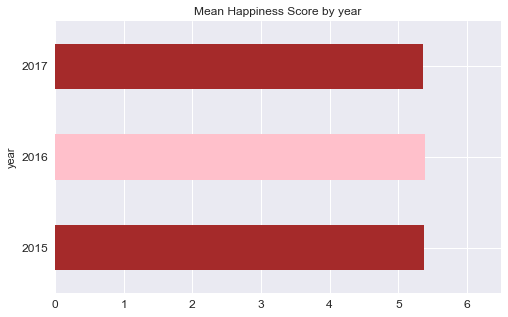

In [1057]:
mean_happy_year.plot(kind="barh", title="Mean Happiness Score by year", xlim=(0,6.5), figsize=(8,5)\
                     ,legend=False, color=["brown", "pink"], fontsize=12)

The world wide mean Happiness Score stayed nearly the same from 2015 to 2017.

### Factors contributing to happiness or the Happiness Score
<p>
Estimations about the contribution of factors to the Happiness Score. <br>
These factors are: 
</p>
<ul>
<li>Economy (GDP per Capita)</li>
<li>Family</li>
<li>Health (Life Expectancy)</li>
<li>Freedom</li>
<li>Trust (Government Corruption)</li>
<li>Generosity</li>
</ul>


In [1058]:
happiness2015_555 = happiness2015
happiness2015_555.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [1059]:
happiness2015_555.iloc[:,5:12].columns

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

Happiness Score is the sum of the factor columns.

In [1060]:
factor_columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']

factor_columns

['Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [1061]:
factor_columns_sum = happiness2015_555[factor_columns].sum(axis=1)

In [1062]:
happiness2015_555=happiness2015_555.assign(sum_factors=factor_columns_sum)
print(happiness2015_555.shape)
print(happiness2015_555.head())

(158, 14)
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938 

In [1063]:
print(happiness2015_555.loc[:,['Happiness Score', 'sum_factors']].head())

   Happiness Score  sum_factors
0            7.587      7.58696
1            7.561      7.56092
2            7.527      7.52708
3            7.522      7.52222
4            7.427      7.42694


Confirming: the Happiness Score is equal to sum_factors.

Simplifying some column names by renaming those.

In [1064]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }


happy_df_3 = [happiness2015, happiness2016 , happiness2017]


In [1065]:

for i in range(0, len(happy_df_3)):
    happy_df_3[i].rename(columns=mapping, inplace=True)

In [1066]:
for i in range(0, len(happy_df_3)):
    print(happy_df_3[i].columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy',
       'Family', 'Health', 'Freedom', 'Trust', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy', 'Family', 'Health', 'Freedom', 'Generosity',
       'Trust', 'Dystopia Residual', 'year'],
      dtype='object')


In [1067]:
happy_df_3[1].iloc[0:6]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,2016


Relevel the factor columns <br>
The factor columns are float with decimal places. This is hard to read and understand. 
Instead the floats are replaced with levels.

In [1068]:
def relevel_factor_columns(data_point, z):
    if data_point > z:
        return 'high'
    else:
        return 'low'

In [1069]:

happiness2015_3 = happy_df_3[0]
print(happiness2015_3.columns)
print(happiness2015_3.head())

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'year'],
      dtype='object')
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy   Family   Health  Freedom    Trust  Generosity  \
0         0.03411  1.39651  1.34951  0.94143  0.66557  0.41978     0.29678   
1         0.04884  1.30232  1.40223  0.94784  0.62877  0.14145     0.43630   
2         0.03328  1.32548  1.36058  0.87464  0.64938  0.48357     0.34139   
3         0.03880  1.45900  1.33095  0.88521  0.66973  0.36503     0.34

In [1070]:
eco_levels = happiness2015_3['Economy'].apply(relevel_factor_columns, z=1)
print(eco_levels.describe())
print(eco_levels.unique())

count     158
unique      2
top       low
freq       92
Name: Economy, dtype: object
['high' 'low']


Change the values of all factor columns.

In [1071]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015_3[factors].applymap(lambda x: 'high' if x > 1 else 'low')


    

In [1072]:
print(factors_impact.describe())

       Economy Family Health Freedom Trust Generosity
count      158    158    158     158   158        158
unique       2      2      2       1     1          1
top        low   high    low     low   low        low
freq        92     89    156     158   158        158


In [1073]:
print(factors_impact.apply(pd.value_counts))


      Economy  Family  Health  Freedom  Trust  Generosity
high       66      89       2      NaN    NaN         NaN
low        92      69     156    158.0  158.0       158.0


Check if change of levels were successful.

In [1074]:
for i in range(0, len(factors_impact.columns)):
    unique_factor_values = factors_impact.loc[i].unique()
    print("{} levels: {}".format(factors[i], unique_factor_values))

Economy levels: ['high' 'low']
Family levels: ['high' 'low']
Health levels: ['high' 'low']
Freedom levels: ['high' 'low']
Trust levels: ['high' 'low']
Generosity levels: ['high' 'low']


In [1075]:
happiness2015_3[factors]=happiness2015_3[factors].applymap(lambda x: 'high' if x > 1 else 'low')

In [1076]:
happiness2015_3.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,high,high,low,low,low,low,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,high,high,low,low,low,low,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,high,high,low,low,low,low,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,high,high,low,low,low,low,2.46531,2015
4,Canada,North America,5,7.427,0.03553,high,high,low,low,low,low,2.45176,2015


In [1077]:
happiness2015_3[factors].apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
high,66,89,2,NaN,NaN,NaN
low,92,69,156,158.0,158.0,158.0


NaN values are there because all values are below one and therefore low.

Determine the percentages of high and low values for every column.

In [1078]:
def percentage_calculation(variable):
    valuecounts = variable.value_counts()
    variable_sum = variable.size
    return valuecounts / variable_sum

In [1079]:
happiness2015_3[factors].apply(percentage_calculation, axis=0)

,Economy,Family,Health,Freedom,Trust,Generosity
high,0.417722,0.563291,0.012658,NaN,NaN,NaN
low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In [1080]:
happiness2015.head()
# happiness2015_3['Economy'] / happiness2015_3['Happiness Score'] 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,high,high,low,low,low,low,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,high,high,low,low,low,low,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,high,high,low,low,low,low,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,high,high,low,low,low,low,2.46531,2015
4,Canada,North America,5,7.427,0.03553,high,high,low,low,low,low,2.45176,2015


In [1081]:
print(happiness2015_555.shape)
# happiness2015_555.head()
happiness2015_67777 = happiness2015_555.copy()
# print(happiness2015_67777.head())
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }
happiness2015_67777 = happiness2015_67777.rename(columns=mapping)
print(happiness2015_67777.columns)
# The factor columns are floats in this data frame

(158, 14)
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'year', 'sum_factors'],
      dtype='object')


Calculate percentage of factor columns on the Happiness Score (, which is the sum of the Happiness Score).

In [1082]:
# factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div =  col/happiness2015_67777['Happiness Score'] 
    return div * 100
factor_percentages=happiness2015_67777[factors].apply(percentages)
print(factor_percentages.head())

# python pandas: apply a function with (many) arguments to a series
# The documentation explains this clearly. The apply method accepts a python function which should have a 
# single parameter. If you want to pass more parameters you should use functools.partial.
# https://stackoverflow.com/questions/12182744/python-pandas-apply-a-function-with-arguments-to-a-series

     Economy     Family     Health   Freedom     Trust  Generosity
0  18.406617  17.787136  12.408462  8.772506  5.532885    3.911691
1  17.224177  18.545563  12.535908  8.315963  1.870784    5.770401
2  17.609672  18.075993  11.620035  8.627342  6.424472    4.535539
3  19.396437  17.694097  11.768280  8.903616  4.852832    4.613002
4  17.857681  17.808132  12.193753  8.522553  4.437458    6.168170


Reshape the data frame using [pd.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) .<br>
This transforms the wide data frame consisting of the factor columns into a long data frame with only one factor and one value column.

In [1083]:
happiness2015_899999 = happiness2015_67777.copy()
print(happiness2015_899999.shape)
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
melt_23=pd.melt(happiness2015_899999, id_vars=main_cols, value_vars=factors, var_name="Factors", value_name="Factor_Score")
print(melt_23.info())
print("The unique values in the Factor colum are: {}".format(melt_23['Factors'].unique()))
print(melt_23.head())

(158, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 6 columns):
Country            1106 non-null object
Region             1106 non-null object
Happiness Rank     1106 non-null int64
Happiness Score    1106 non-null float64
Factors            1106 non-null object
Factor_Score       1106 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 51.9+ KB
None
The unique values in the Factor colum are: ['Economy' 'Family' 'Health' 'Freedom' 'Trust' 'Generosity'
 'Dystopia Residual']
       Country          Region  Happiness Rank  Happiness Score  Factors  \
0  Switzerland  Western Europe               1            7.587  Economy   
1      Iceland  Western Europe               2            7.561  Economy   
2      Denmark  Western Europe               3            7.527  Economy   
3       Norway  Western Europe               4            7.522  Economy   
4       Canada   North America               5            7.427  Econo

In [1084]:
melt_23['Percentage'] = round(melt_23['Factor_Score'] / melt_23['Happiness Score']*100,2)

In [1085]:
melt_23.head()

,Country,Region,Happiness Rank,Happiness Score,Factors,Factor_Score,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


In Switzerland a country of Western Europe the economy contributes with a percentage of 18.41 to the Happiness Score.

Which factors are contributing the most to happiness?

Drop observations, where 'Dystopia Residual' in Factors.

In [1086]:
melt_455 = melt_23.copy()
melt_455 = melt_455[melt_455['Factors'] != 'Dystopia Residual']

Create a pivot table or group by Factors and aggregrate the data with the mean function.

            Factor_Score
Factors                 
Family          0.991046
Economy         0.846137
Health          0.630259
Freedom         0.428615
Generosity      0.237296
Trust           0.143422


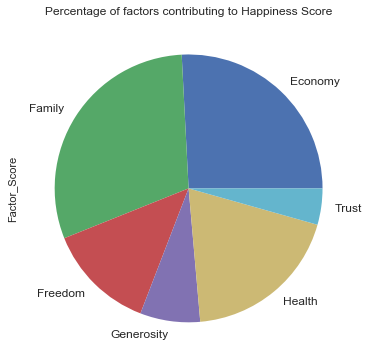

In [1087]:

pv_melt = pd.pivot_table(melt_455, values='Factor_Score', index='Factors')
print(pv_melt.sort_values('Factor_Score', ascending=False))
pv_melt.plot(kind='pie', y='Factor_Score', legend=False,\
             title="Percentage of factors contributing to Happiness Score",
             figsize=(6,7), fontsize=12)

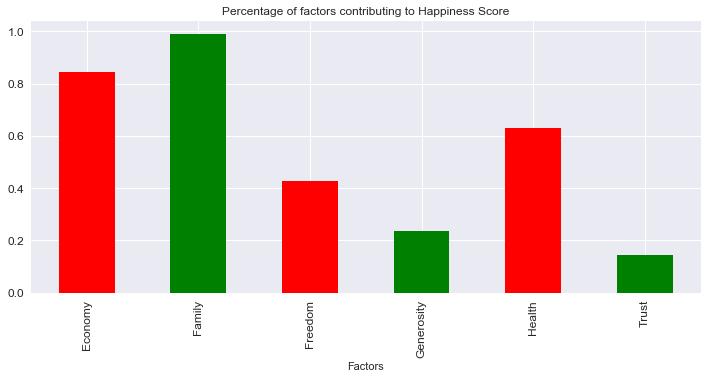

In [1088]:


pv_melt.plot(kind='bar', y='Factor_Score', legend=False, color=("red", "green"), 
             title="Percentage of factors contributing to Happiness Score", fontsize=12,\
             figsize=(12,5))

Economy creates the most to the Happiness Score then followed by family and with a distance by health. Trust contributes
the least to Happiness.

### New data set: economic data of countries
Amending the happiness2015 data set with economic data on countries from the world bank ( [source: Kaggle](https://www.kaggle.com/worldbank/world-development-indicators/version/2#Country.csv) ) . 
The variables in the data set are economic indicators, coding and identifiers of the countries.

In [1089]:
countries_indicators = pd.read_csv("Country.csv", sep=",", header=0)
print(countries_indicators.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 31 columns):
CountryCode                                   247 non-null object
ShortName                                     247 non-null object
TableName                                     247 non-null object
LongName                                      247 non-null object
Alpha2Code                                    244 non-null object
CurrencyUnit                                  214 non-null object
SpecialNotes                                  164 non-null object
Region                                        214 non-null object
IncomeGroup                                   214 non-null object
Wb2Code                                       246 non-null object
NationalAccountsBaseYear                      205 non-null object
NationalAccountsReferenceYear                 54 non-null object
SnaPriceValuation                             198 non-null object
LendingCategory                       

Cleaning provisionally: The variable "SourceOfMostRecentIncomeAndExpenditureData" is too long as name.

In [1090]:
countries_indicators.rename(columns={'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}, inplace=True)

Creating an identifier column for the variables coming from the World Bank data set.

In [1091]:
countries_indicators["Source"] = "World Bank"

In [1092]:
countries_indicators.columns

Index(['CountryCode', 'ShortName', 'TableName', 'LongName', 'Alpha2Code',
       'CurrencyUnit', 'SpecialNotes', 'Region', 'IncomeGroup', 'Wb2Code',
       'NationalAccountsBaseYear', 'NationalAccountsReferenceYear',
       'SnaPriceValuation', 'LendingCategory', 'OtherGroups',
       'SystemOfNationalAccounts', 'AlternativeConversionFactor',
       'PppSurveyYear', 'BalanceOfPaymentsManualInUse',
       'ExternalDebtReportingStatus', 'SystemOfTrade',
       'GovernmentAccountingConcept', 'ImfDataDisseminationStandard',
       'LatestPopulationCensus', 'LatestHouseholdSurvey', 'IESurvey',
       'VitalRegistrationComplete', 'LatestAgriculturalCensus',
       'LatestIndustrialData', 'LatestTradeData', 'LatestWaterWithdrawalData',
       'Source'],
      dtype='object')

Merging happiness 2015 with countries indicators.<br>
This is done with a left join, which will return only countries contained in happiness 2015.<br>

In [1093]:
happiness2015_1999 = happiness2015_67777.copy()
print(happiness2015_1999.shape)
# happiness2015_1999.head()
merge_happy_indic = pd.merge(left=happiness2015_1999, left_on="Country", right=countries_indicators, 
                             right_on='ShortName', how='left')

print(merge_happy_indic.info())
print(merge_happy_indic.shape)

(158, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 46 columns):
Country                          158 non-null object
Region_x                         158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy                          158 non-null float64
Family                           158 non-null float64
Health                           158 non-null float64
Freedom                          158 non-null float64
Trust                            158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
year                             158 non-null object
sum_factors                      158 non-null float64
CountryCode                      145 non-null object
ShortName                        145 non-null object
TableName                   

<p>
These variables are used in this project:
</p>    

<ul>
<li>ShortName - Name of the country</li>
<li>Region - The region the country belongs to</li>
<li>IncomeGroup - The income group the country belongs to, based on Gross National Income (GNI) per capita</li>
<li>CurrencyUnit - Name of country's currency</li>
<li>IESurvey - The name of the survey used to collect the income and expenditure data</li>
<li>SpecialNotes - Contains any miscellaneous notes about the data</li>
</ul>

In [1094]:
merge_happy_indic_45 = merge_happy_indic.copy() 
variables_used_345 = ["Country", "Happiness Rank", "Happiness Score", "ShortName", "Region_x", 
                      "IncomeGroup"   , "CurrencyUnit"  , "IESurvey"   , "SpecialNotes"]
merge_happy_indic_45 = merge_happy_indic_45[variables_used_345]
print(merge_happy_indic_45.shape)

(158, 9)


In [1095]:
merge_happy_indic_45.rename(columns={'Region_x':'Region'}, inplace=True)
merge_happy_indic_45.head(2)

,Country,Happiness Rank,Happiness Score,ShortName,Region,IncomeGroup,CurrencyUnit,IESurvey,SpecialNotes
0,Switzerland,1,7.587,Switzerland,Western Europe,High income: OECD,Swiss franc,"Expenditure survey/budget survey (ES/BS), 2004",NaN
1,Iceland,2,7.561,Iceland,Western Europe,High income: OECD,Iceland krona,"Integrated household survey (IHS), 2010",NaN


The Happiness Rank of the first five countries are correlating with the high income group.

Extracting the unit of the CurrencyUnit-Variable without nationality.

In [1096]:
def extract_last_word(element):
    element = str(element)
    listwords = element.split()
    lastword = listwords[-1]
    return lastword

merge_happy_indic_45['Currency_Type'] = merge_happy_indic_45['CurrencyUnit'].apply(extract_last_word)
merge_happy_indic_45['Currency_Type'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency_Type, dtype: object

Extract continent from region.

In [1097]:
merge_happy_indic_45['Continent']=merge_happy_indic_45['Region'].str.split().str.get(-1)

In [1098]:
print(merge_happy_indic_45.loc[0:10,['Country', 'Region', 'Continent', 'Happiness Score']])
print(merge_happy_indic_45.shape)

        Country                           Region Continent  Happiness Score
0   Switzerland                   Western Europe    Europe            7.587
1       Iceland                   Western Europe    Europe            7.561
2       Denmark                   Western Europe    Europe            7.527
3        Norway                   Western Europe    Europe            7.522
4        Canada                    North America   America            7.427
5       Finland                   Western Europe    Europe            7.406
6   Netherlands                   Western Europe    Europe            7.378
7        Sweden                   Western Europe    Europe            7.364
8   New Zealand        Australia and New Zealand   Zealand            7.286
9     Australia        Australia and New Zealand   Zealand            7.284
10       Israel  Middle East and Northern Africa    Africa            7.278
(158, 11)


Extracting years from IE Survey and enter these in a new column.

In [1099]:
merge_happy_indic_45["Year_published"] = merge_happy_indic_45['IESurvey'].str.split(pat=',').str.get(-1)

In [1100]:
merge_happy_indic_45.head(2)


,Country,Happiness Rank,Happiness Score,ShortName,Region,IncomeGroup,CurrencyUnit,IESurvey,SpecialNotes,Currency_Type,Continent,Year_published
0,Switzerland,1,7.587,Switzerland,Western Europe,High income: OECD,Swiss franc,"Expenditure survey/budget survey (ES/BS), 2004",NaN,franc,Europe,2004
1,Iceland,2,7.561,Iceland,Western Europe,High income: OECD,Iceland krona,"Integrated household survey (IHS), 2010",NaN,krona,Europe,2010


Look for null values <br>
Printing out the null values for every column running or [iterating in parallel](https://stackoverflow.com/questions/1663807/how-to-iterate-through-two-lists-in-parallel)  over two lists.

In [1101]:
number_columns = list(range(0,len(merge_happy_indic_45.columns)))
print(type(number_columns ))
print(number_columns)
cols_12 = merge_happy_indic_45.columns.tolist()
print(type(cols_12)) 
print(cols_12)
null_values = {}

<class 'list'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
<class 'list'>
['Country', 'Happiness Rank', 'Happiness Score', 'ShortName', 'Region', 'IncomeGroup', 'CurrencyUnit', 'IESurvey', 'SpecialNotes', 'Currency_Type', 'Continent', 'Year_published']


In [1102]:
for i, f in zip(number_columns, cols_12):
        null_value = merge_happy_indic_45.iloc[:,i].isnull().sum()
        null_values[f] = null_value
        
print(null_values)

{'Country': 0, 'Happiness Rank': 0, 'Happiness Score': 0, 'ShortName': 13, 'Region': 0, 'IncomeGroup': 13, 'CurrencyUnit': 13, 'IESurvey': 28, 'SpecialNotes': 65, 'Currency_Type': 0, 'Continent': 0, 'Year_published': 28}


Calculate the length of the values of some variables excluding null values.

In [1103]:
def calculate_length(value):
    if pd.isnull(value):
        pass
    else:
        return len(str(value))

In [1104]:
lengths_currencyunit= merge_happy_indic_45['CurrencyUnit'].apply(func=calculate_length)
lengths_currencyunit.value_counts(dropna=False).sort_values()

 20.0     1
 26.0     1
 39.0     1
 10.0     1
 23.0     1
 9.0      2
 19.0     3
 25.0     5
 22.0     7
 11.0     8
 18.0     9
 17.0     9
 16.0    12
 15.0    13
NaN      13
 13.0    14
 12.0    17
 4.0     20
 14.0    21
Name: CurrencyUnit, dtype: int64

Of all strings 21 strings have a length of 14 and 12 a length of 16. There are 13 NaN values. The length
of these were not counted.

In [1105]:
lengths_region= merge_happy_indic_45['Region'].apply(func=calculate_length)
lengths_region.value_counts(dropna=False).sort_values()

25     2
12     6
17     9
13     9
31    20
14    21
27    22
26    29
18    40
Name: Region, dtype: int64

Create a data frame of the calculated length of the string values in selected columns.

In [1106]:
merge_str_cols = merge_happy_indic_45.iloc[:, [0,4,5,6,7,8,9]]
number_columns_2 = list(range(0,len(merge_str_cols.columns)))
cols_2342 = merge_str_cols.columns.tolist()
cols_2342
# merge_str_cols.tail(2)

string_length_selected_variables = pd.DataFrame()

for i,f in zip(number_columns_2, cols_2342):
    lengths_all= merge_str_cols.iloc[:,i].apply(func=calculate_length)
    string_length_selected_variables[f] = lengths_all

print(string_length_selected_variables.head(2))



   Country  Region  IncomeGroup  CurrencyUnit  IESurvey  SpecialNotes  \
0       11      14         17.0          11.0      46.0           NaN   
1        7      14         17.0          13.0      39.0           NaN   

   Currency_Type  
0              5  
1              5  


In [1107]:
string_length_selected_variables['Region'].value_counts(dropna=False).sort_values()

25     2
12     6
17     9
13     9
31    20
14    21
27    22
26    29
18    40
Name: Region, dtype: int64

Searching for patterns.

In [1108]:
pattern_1 = r"[Nn]ational accounts"
national_accounts = merge_happy_indic_45['SpecialNotes'].str.contains(pattern_1, na=False)
# print(national_accounts.tail(3))
# print(national_accounts.value_counts(dropna=False))
# Subset the df merge with national_accounts as row index
merge_national = merge_happy_indic_45[national_accounts]
merge_national.loc[:, ['Country', 'SpecialNotes']].head(2)

,Country,SpecialNotes
4,Canada,Fiscal year end: March 31; reporting period fo...
7,Sweden,Fiscal year end: June 30; reporting period for...


In [1109]:
pattern_2 = r"land$"
land = merge_happy_indic_45['Country'].str.contains(pattern_2, na=False)
print(land.head(2))
print(land.value_counts(dropna=False))

0    True
1    True
Name: Country, dtype: bool
False    150
True       8
Name: Country, dtype: int64


In [1110]:
merge_land = merge_happy_indic_45[land]
merge_land.loc[:, ['Country']].head(5)

,Country
0,Switzerland
1,Iceland
5,Finland
8,New Zealand
17,Ireland


In [1111]:
pattern_3 = r"Europe$"
europe = merge_happy_indic_45['Region'].str.contains(pattern_3)
print(europe.head(3))
print(europe.value_counts(dropna=False))


0    True
1    True
2    True
Name: Region, dtype: bool
False    108
True      50
Name: Region, dtype: int64


In [1112]:
merge_europe = merge_happy_indic_45[europe]
merge_europe.loc[:, ['Country','Region']].head(5)

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
5,Finland,Western Europe


In [1113]:
# Extract years from special notes
#  named capturing group: ?P<Years> creates a column name year
pattern_4 =r"(?P<Years>[1-9][0-9][0-9][0-9])"
years = merge_happy_indic_45['SpecialNotes'].str.extract(pattern_4, expand=True)
years.dropna().head()

,Years
5,1999
6,1999
9,1990
10,2010
12,1999


In [1114]:
pattern_5 = r"(?P<Years>[1-2][0-9]{3})"
years=merge_happy_indic_45['IESurvey'].str.extractall(pattern_5)
value_counts=years['Years'].value_counts().sort_index()
value_counts

1992     1
1995     1
1998     1
1999     1
2000     1
2002     1
2003     1
2004     3
2005     6
2006     1
2007     4
2008     6
2009     8
2010    28
2011    22
2012    33
2013    12
Name: Years, dtype: int64

Searching for the pattern yyyy/yy (1995/97 or 2002/03 or Integrated household survey (IHS), 2012/13) in 'IESurvey'.

In [1115]:
merge_happy_indic_45.loc[130, 'IESurvey']

'Integrated household survey (IHS), 2010/11'

In [1116]:
# This makes an optional group ?P<First_Year>
# The parantheses () makes sure the group is recognized and extracted.
pattern_6=r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"

In [1117]:
years_34534 = merge_happy_indic_45['IESurvey'].str.extractall(pattern_6)

years_34534[years_34534['Second_Year'].notnull()].head()

,,First_Year,Second_Year
,match,,
77,0,2009,10
79,0,2011,12
80,0,2010,11
93,0,2008,09
94,0,2011,12


The second year is missing the 1000 years and centuries decimals. This is complemented now <br>
by taking the first two digits from first year and place these as the first two digits in <br>
second year.

In [1118]:
first_two_years = years_34534['First_Year'].str[0:2]
first_two_years.head() 

   match
0  0        20
1  0        20
2  0        20
3  0        20
4  0        20
Name: First_Year, dtype: object

In [1119]:
years_34534['Second_Year'] = first_two_years.str.cat(years_34534['Second_Year'])
years_34534[years_34534['Second_Year'].notnull()].head()

,,First_Year,Second_Year
,match,,
77,0,2009,2010
79,0,2011,2012
80,0,2010,2011
93,0,2008,2009
94,0,2011,2012


Cleaning IncomeGroup.

In [1120]:
merge_happy_indic_45['IncomeGroup'].head()

0    High income: OECD
1    High income: OECD
2    High income: OECD
3    High income: OECD
4    High income: OECD
Name: IncomeGroup, dtype: object

In [1121]:
merge_happy_indic_6777 = merge_happy_indic_45.copy()
merge_happy_indic_6777['IncomeGroup'].unique()

array(['High income: OECD', 'Upper middle income', 'High income: nonOECD',
       nan, 'Lower middle income', 'Low income'], dtype=object)

In [1122]:
merge_happy_indic_6777['IncomeGroup'] = merge_happy_indic_6777['IncomeGroup'].str.replace(':', '').str.replace('income', '').str.strip()

In [1123]:
merge_happy_indic_6777['IncomeGroup'] = merge_happy_indic_6777['IncomeGroup'].str.upper()

In [1124]:
print(merge_happy_indic_6777['IncomeGroup'].unique())
print(merge_happy_indic_6777.columns)

['HIGH  OECD' 'UPPER MIDDLE' 'HIGH  NONOECD' nan 'LOWER MIDDLE' 'LOW']
Index(['Country', 'Happiness Rank', 'Happiness Score', 'ShortName', 'Region',
       'IncomeGroup', 'CurrencyUnit', 'IESurvey', 'SpecialNotes',
       'Currency_Type', 'Continent', 'Year_published'],
      dtype='object')


In [1125]:
pv_incomes = merge_happy_indic_6777.dropna().pivot_table(values='Happiness Score', 
                                                         index='IncomeGroup').round(2).sort_values('Happiness Score'
                                                                                                   , ascending=False)
pv_incomes

,Happiness Score
IncomeGroup,
HIGH OECD,6.57
HIGH NONOECD,5.95
UPPER MIDDLE,5.30
LOWER MIDDLE,4.92
LOW,4.11


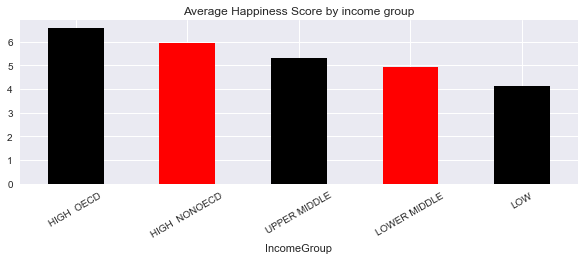

In [1126]:
pv_incomes.plot(kind='bar', title="Average Happiness Score by income group", color=['black', "red"], rot=30,\
                figsize=(10,3), legend=False)
plt.show()

High OECD income countries have on average the highest Happiness Scores. 
In accordance with intuition low income countries have the lowest Happiness Scores on average.

Median of Happiness Score by Region.

In [1127]:
merge_happy_indic_6777['Region'] = merge_happy_indic_6777['Region']\
                                   .str.replace(':', '').str.replace(' ', '_').str.strip().str.lower()
print(merge_happy_indic_6777['Region'].unique())

['western_europe' 'north_america' 'australia_and_new_zealand'
 'middle_east_and_northern_africa' 'latin_america_and_caribbean'
 'southeastern_asia' 'central_and_eastern_europe' 'eastern_asia'
 'sub-saharan_africa' 'southern_asia']


In [1128]:
pv_country_23 = merge_happy_indic_6777.dropna()\
                .pivot_table(values="Happiness Score", index ="Region", aggfunc=np.median)\
                .round(2).sort_values('Happiness Score')
pv_country_23

,Happiness Score
Region,
middle_east_and_northern_africa,4.44
sub-saharan_africa,4.47
southern_asia,4.63
eastern_asia,5.14
central_and_eastern_europe,5.21
southeastern_asia,5.38
latin_america_and_caribbean,5.93
western_europe,6.94
north_america,7.27


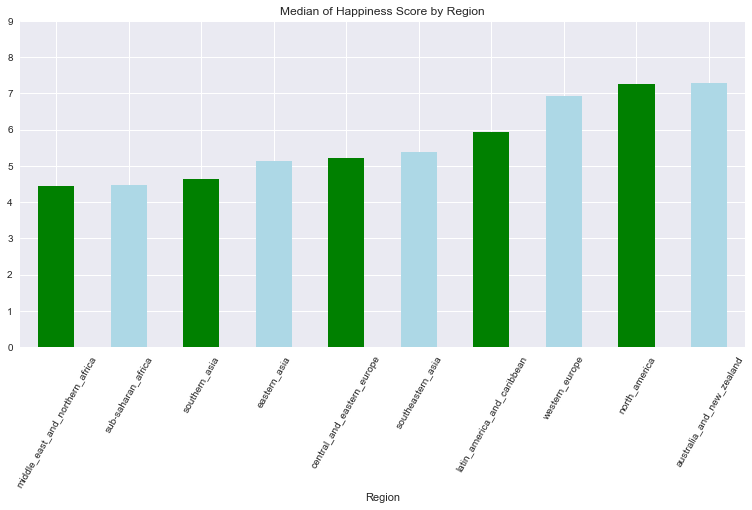

In [1129]:

pv_country_23.plot(kind="bar", title="Median of Happiness Score by Region", \
                   rot=60, ylim=(0,9), figsize=(13,6), color=['green', "lightblue"], legend=False)
plt.show()

Australia is the Region with the highest median Happiness Score. The middle east has the lowest median Happiness Score.

### Data cleaning

In [1130]:
happiness2015_234 = pd.read_csv('world-happiness-report\\2015.csv')
happiness2016_234 = pd.read_csv('world-happiness-report\\2016.csv')
happiness2017_234 = pd.read_csv('world-happiness-report\\2017.csv')

happiness2015_234['year']=int(2015)
happiness2016_234['year']=int(2016)
happiness2017_234['year']=int(2017)

mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust', 'Health..Life.Expectancy.':'Health',
          'Trust..Government.Corruption.': 'Trust', 'Dystopia.Residual':'Dystopia Residual',
          'Economy..GDP.per.Capita.':'Economy', 'Happiness.Score':'Happiness Score',
          'Happiness.Rank':'Happiness Rank'}

happiness2015_234 = happiness2015_234.rename(columns=mapping)
happiness2016_234 = happiness2016_234.rename(columns=mapping)
happiness2017_234 = happiness2017_234.rename(columns=mapping)


print(happiness2015_234.columns)
print(happiness2016_234.columns)
print(happiness2017_234.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'year'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy',
       'Family', 'Health', 'Freedom', 'Trust', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')
Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy', 'Family', 'Health', 'Freedom', 'Generosity',
       'Trust', 'Dystopia Residual', 'year'],
      dtype='object')


Region is missing 2017 as a variable.

In [1131]:
pd.concat([happiness2015_234['year'], happiness2016_234['year'], happiness2017_234['year']], axis=1).head()

,year,year,year
0,2015,2016.0,2017.0
1,2015,2016.0,2017.0
2,2015,2016.0,2017.0
3,2015,2016.0,2017.0
4,2015,2016.0,2017.0


In [1132]:
print(happiness2015_234['year'].dtype)
print(happiness2016_234['year'].dtype)
print(happiness2017_234['year'].dtype)

int64
int64
int64


In [1133]:
shape_2015 = happiness2015_234.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape
print(shape_2015)
print(shape_2016)
print(shape_2017)

(158, 13)
(157, 14)
(155, 13)


In [1134]:
country_15_23 = happiness2015_234['Country'].copy().sort_values()
country_16_23 = happiness2016_234['Country'].copy().sort_values()
country_17_23 = happiness2016_234['Country'].copy().sort_values()

country_15_23 = country_15_23.reset_index(drop=True)
country_16_23 = country_16_23.reset_index(drop=True)
country_17_23 = country_17_23.reset_index(drop=True)

country_23 = pd.concat([country_15_23, country_16_23, country_17_23
                       ], axis=1, keys=["Country_15", "Country_16", "Country_17"])

country_23.iloc[8:14,:]


,Country_15,Country_16,Country_17
8,Azerbaijan,Azerbaijan,Azerbaijan
9,Bahrain,Bahrain,Bahrain
10,Bangladesh,Bangladesh,Bangladesh
11,Belarus,Belarus,Belarus
12,Belgium,Belgium,Belgium
13,Benin,Belize,Belize


Benin is in 16 and 15, but Belize is only in 16. Use concat or merge?

In [1135]:
unified_df_12 = pd.concat([happiness2015_234, happiness2016_234, happiness2017_234], axis=0, ignore_index=True)

In [1136]:
unified_df_12.head(2)

,Country,Dystopia Residual,Economy,Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health,Lower Confidence Interval,Region,Standard Error,Trust,Upper Confidence Interval,Whisker.high,Whisker.low,year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015


In [1137]:
unified_df_12.tail(2)

,Country,Dystopia Residual,Economy,Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health,Lower Confidence Interval,Region,Standard Error,Trust,Upper Confidence Interval,Whisker.high,Whisker.low,year
468,Burundi,1.683024,0.091623,0.629794,0.059901,0.204435,154,2.905,0.151611,NaN,NaN,NaN,0.084148,NaN,3.074690,2.735310,2017
469,Central African Republic,2.066005,0.000000,0.000000,0.270842,0.280876,155,2.693,0.018773,NaN,NaN,NaN,0.056565,NaN,2.864884,2.521116,2017


In [1138]:
print(unified_df_12['year'].unique())
print(unified_df_12.shape)
print(unified_df_12.info())

[2015 2016 2017]
(470, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
Country                      470 non-null object
Dystopia Residual            470 non-null float64
Economy                      470 non-null float64
Family                       470 non-null float64
Freedom                      470 non-null float64
Generosity                   470 non-null float64
Happiness Rank               470 non-null int64
Happiness Score              470 non-null float64
Health                       470 non-null float64
Lower Confidence Interval    157 non-null float64
Region                       315 non-null object
Standard Error               158 non-null float64
Trust                        470 non-null float64
Upper Confidence Interval    157 non-null float64
Whisker.high                 155 non-null float64
Whisker.low                  155 non-null float64
year                         470 non-null int64
dtypes: float64(13), int

### Dealing with missing values.

In [1139]:
# Are there missing values?
unified_df_12.isnull().sum()

Country                        0
Dystopia Residual              0
Economy                        0
Family                         0
Freedom                        0
Generosity                     0
Happiness Rank                 0
Happiness Score                0
Health                         0
Lower Confidence Interval    313
Region                       155
Standard Error               312
Trust                          0
Upper Confidence Interval    313
Whisker.high                 315
Whisker.low                  315
year                           0
dtype: int64

There are missing values. These can be visualized for further clarification.

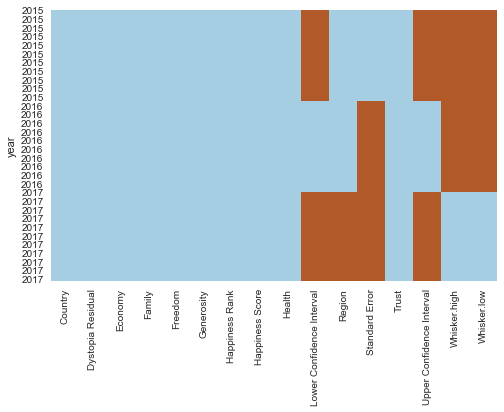

In [1140]:
# sns.set(rc={'figure.figsize':(12,6)})
sns.set(rc={'figure.figsize':(8,5)})
unified_df_12_indexed = unified_df_12.set_index('year')
sns.heatmap(unified_df_12_indexed.isnull(), cbar=False, yticklabels=15, cmap="Paired")
plt.show()

<p>
The blue area represents the non missing values, the orange area represents the missing values.<br>
Confidence, Region, Error are missing in 2017. Confidence is also missing in 2015. <br>
Whiskers are missing 2015 and 2016.
</p>
<p>
The goal here is to analyse the Happiness Score related to countries. <br>
Immediately some columns with missing values are not necessary for this goal.<br>
These columns can be dropped.
</p>

In [1141]:
# unified_df_12 = unified_df_12.copy()
unified_df_12 = unified_df_12.drop(['Lower Confidence Interval', 'Upper Confidence Interval', 
                                       'Whisker.high', 'Whisker.low', 'Standard Error'], axis=1)

In [1142]:
unified_df_12.columns

Index(['Country', 'Dystopia Residual', 'Economy', 'Family', 'Freedom',
       'Generosity', 'Happiness Rank', 'Happiness Score', 'Health', 'Region',
       'Trust', 'year'],
      dtype='object')

In [1143]:
unified_df_12.isnull().sum()

Country                0
Dystopia Residual      0
Economy                0
Family                 0
Freedom                0
Generosity             0
Happiness Rank         0
Happiness Score        0
Health                 0
Region               155
Trust                  0
year                   0
dtype: int64

The region column still contains missing values.<br>
The region column is essential for the goal of this analysis.

In [1144]:
unified_df_12.columns = unified_df_12.columns.str.upper().str.strip().str.replace(" ", "_")
print(unified_df_12.columns)
print(unified_df_12.index.unique())
print(unified_df_12.shape)

Index(['COUNTRY', 'DYSTOPIA_RESIDUAL', 'ECONOMY', 'FAMILY', 'FREEDOM',
       'GENEROSITY', 'HAPPINESS_RANK', 'HAPPINESS_SCORE', 'HEALTH', 'REGION',
       'TRUST', 'YEAR'],
      dtype='object')
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            460, 461, 462, 463, 464, 465, 466, 467, 468, 469],
           dtype='int64', length=470)
(470, 12)


In [1145]:
region_15 = unified_df_12.loc[unified_df_12['YEAR']==2015, ["REGION"]]
missing_15 = region_15.isnull().sum()
print(missing_15)

REGION    0
dtype: int64


In [1146]:
region_16 = unified_df_12.loc[unified_df_12['YEAR']==2016, ["REGION"]]
missing_16 = region_16.isnull().sum()
print(missing_16)

REGION    0
dtype: int64


In [1147]:
region_17 = unified_df_12.loc[unified_df_12['YEAR']==2017, ["REGION"]]
missing_17 = region_17.isnull().sum()
print(missing_17)

REGION    155
dtype: int64


The missing values of REGION are all of 2017. How to fill in the name of the 
regions into the region column of 2017?

In [1148]:
# happiness2015_234['year'], happiness2016_234['year']
regions_known = pd.concat([happiness2015_234, happiness2016_234], join='outer', axis=0)
regions_known.sort_values("Country", inplace = True) 
regions_known = regions_known.drop_duplicates(subset='Country', keep='first').reset_index()
regions_known = regions_known[['Country', 'Region']]
regions_known.rename(columns={'Country':'COUNTRY', 'Region':'REGION'}, inplace=True)
print(regions_known.head())
print(regions_known.shape)



       COUNTRY                           REGION
0  Afghanistan                    Southern Asia
1      Albania       Central and Eastern Europe
2      Algeria  Middle East and Northern Africa
3       Angola               Sub-Saharan Africa
4    Argentina      Latin America and Caribbean
(164, 2)


Imputing nan of REGIONS with regions of 2015 and 2016 associated with COUNTRIES.

In [1149]:
unified_all_regions = pd.merge(left=unified_df_12, right=regions_known, on = 'COUNTRY', 
                               how='left', left_index=True)


unified_all_regions.head(1)

,COUNTRY,DYSTOPIA_RESIDUAL,ECONOMY,FAMILY,FREEDOM,GENEROSITY,HAPPINESS_RANK,HAPPINESS_SCORE,HEALTH,REGION_x,TRUST,YEAR,REGION_y
141,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015,Western Europe


In [1150]:
unified_all_regions.reset_index(inplace=True, drop=True)
unified_all_regions.head(2)

,COUNTRY,DYSTOPIA_RESIDUAL,ECONOMY,FAMILY,FREEDOM,GENEROSITY,HAPPINESS_RANK,HAPPINESS_SCORE,HEALTH,REGION_x,TRUST,YEAR,REGION_y
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.41978,2015,Western Europe
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.14145,2015,Western Europe


In [1151]:
print(unified_all_regions.columns)
print(unified_all_regions.isnull().sum())
print(unified_all_regions.shape)
print(unified_all_regions['YEAR'].unique())

Index(['COUNTRY', 'DYSTOPIA_RESIDUAL', 'ECONOMY', 'FAMILY', 'FREEDOM',
       'GENEROSITY', 'HAPPINESS_RANK', 'HAPPINESS_SCORE', 'HEALTH', 'REGION_x',
       'TRUST', 'YEAR', 'REGION_y'],
      dtype='object')
COUNTRY                0
DYSTOPIA_RESIDUAL      0
ECONOMY                0
FAMILY                 0
FREEDOM                0
GENEROSITY             0
HAPPINESS_RANK         0
HAPPINESS_SCORE        0
HEALTH                 0
REGION_x             155
TRUST                  0
YEAR                   0
REGION_y               2
dtype: int64
(470, 13)
[2015 2016 2017]


In [1152]:
unified_all_regions =unified_all_regions.drop('REGION_x', axis=1)
unified_all_regions.rename(columns={'REGION_y':'REGION'}, inplace=True)


Still 2 null values in REGION_y. There maybe two countries in 2017, which are not in 2015 and 2016.

In [1153]:
unified_all_regions.head(1)

,COUNTRY,DYSTOPIA_RESIDUAL,ECONOMY,FAMILY,FREEDOM,GENEROSITY,HAPPINESS_RANK,HAPPINESS_SCORE,HEALTH,TRUST,YEAR,REGION
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,0.41978,2015,Western Europe


In [1154]:
print(unified_all_regions.shape)
print(unified_all_regions.index.unique())
print(unified_all_regions['YEAR'].unique())

(470, 12)
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            460, 461, 462, 463, 464, 465, 466, 467, 468, 469],
           dtype='int64', length=470)
[2015 2016 2017]


In [1155]:
additional_countries_2017 = unified_all_regions.loc[unified_all_regions['REGION'].isnull(), ['COUNTRY', 'REGION']]
additional_countries_2017

,COUNTRY,REGION
347,Taiwan Province of China,NaN
385,"Hong Kong S.A.R., China",NaN


In [1156]:
taiwan_1 = unified_all_regions[unified_all_regions['COUNTRY'].str.contains('^Taiwan')]
taiwan_1

,COUNTRY,DYSTOPIA_RESIDUAL,ECONOMY,FAMILY,FREEDOM,GENEROSITY,HAPPINESS_RANK,HAPPINESS_SCORE,HEALTH,TRUST,YEAR,REGION
37,Taiwan,2.323230,1.290980,1.076170,0.397400,0.25376,38,6.298,0.875300,0.081290,2015,Eastern Asia
192,Taiwan,2.615230,1.397290,0.926240,0.323770,0.25495,34,6.379,0.795650,0.066300,2016,Eastern Asia
347,Taiwan Province of China,2.126607,1.433627,1.384565,0.361467,0.25836,33,6.422,0.793984,0.063829,2017,NaN


In 2017 Taiwan is called Taiwan Province of China. Not being political 
Taiwan Province of China 2017 is renamed to Taiwan.

In [1157]:
unified_all_regions.loc[347,'COUNTRY'] = 'Taiwan'
unified_all_regions.loc[347,'REGION'] = 'Eastern Asia'
# print(unified_all_regions[unified_all_regions['COUNTRY'].str.contains('^Taiwan')])

In [1158]:
hongkong_1 = unified_all_regions[unified_all_regions['COUNTRY'].str.contains('^Hong Kong')]
hongkong_1['COUNTRY']

71                   Hong Kong
232                  Hong Kong
385    Hong Kong S.A.R., China
Name: COUNTRY, dtype: object

Similar to Taiwan.

In [1159]:
unified_all_regions.loc[385,'COUNTRY'] = 'Hong Kong'
unified_all_regions.loc[385,'REGION'] = 'Eastern Asia'

In [1160]:
print(unified_all_regions.isnull().sum())

COUNTRY              0
DYSTOPIA_RESIDUAL    0
ECONOMY              0
FAMILY               0
FREEDOM              0
GENEROSITY           0
HAPPINESS_RANK       0
HAPPINESS_SCORE      0
HEALTH               0
TRUST                0
YEAR                 0
REGION               0
dtype: int64


In [1161]:
unified_all_regions.head(2)

,COUNTRY,DYSTOPIA_RESIDUAL,ECONOMY,FAMILY,FREEDOM,GENEROSITY,HAPPINESS_RANK,HAPPINESS_SCORE,HEALTH,TRUST,YEAR,REGION
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,0.41978,2015,Western Europe
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,0.14145,2015,Western Europe


The null values in REGION are gone.

In [1162]:
# Check for dupliates

duplicates_1 = unified_all_regions.duplicated(['COUNTRY', 'YEAR'])
unified_all_regions.loc[duplicates_1, ['COUNTRY', 'YEAR']]

,COUNTRY,YEAR


There are none duplicates of countries in any year.